# Best Selling Manga Data Analysis

For this data analysis, we want to explore and visualize which manga is the best selling series. We will also try to use model building to predict the highest sales for a manga title.

In [1]:
#Basic import packages for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#variable for the dataset
manga = pd.read_csv("C:\\Users\\Kevin Luu\\Downloads\\best-selling-manga.csv")
manga

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
...,...,...,...,...,...,...,...,...
182,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0,0.90
183,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20.0,0.95
184,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20.0,1.53
185,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0,0.58


In [3]:
#head of the manga dataset
display(manga.head())

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [4]:
#tail of the manga dataset
display(manga.tail())

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
182,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0,0.90
183,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20.0,0.95
184,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20.0,1.53
185,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0,0.58
186,Weed,Yoshihiro Takahashi,Nihon Bungeisha,Seinen,60,1999–2009,20.0,0.33


In [5]:
#information of the manga dataset
display(manga.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ KB


None

In [6]:
display(manga.isnull().values.any())

False

In [7]:
display(manga.isnull().sum())

Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64

No need to fill in values since there are no missing values in the dataset.

# Plots for the Dataset

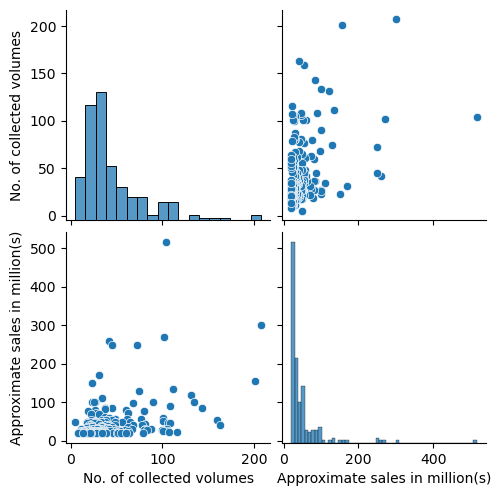

In [8]:
#pairplot for the dataset
sns.pairplot(manga.iloc[:,4:7])

Based on the pairplot, we see that there is high correlation on the Number of Collected Volumes and Approximate sales in millon(s). We have histograms that skewed to the right for the graphs of No. of collected volumes - No. of collected volumes and Approximate sales in million(s) - Approximate sales in million(s)

<Axes: >

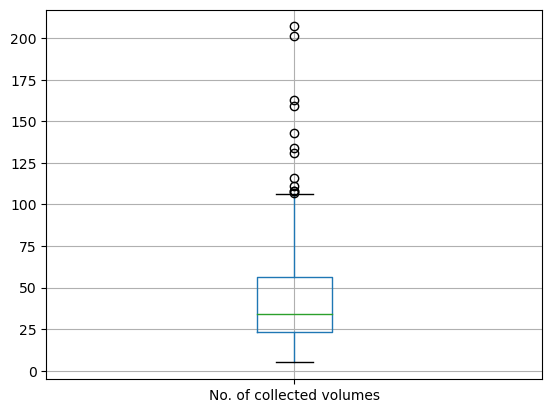

In [9]:
manga.boxplot("No. of collected volumes")

We see that the boxplot for the No. of collected volumes has a few outliers, which ranges from approximately 110 and 210.

# Label Encoding for the Dataset

We would need to do some label encoding for the object variables in the dataset, which includes Manga series, Author(s), Publisher, Demographic, and Serialized.

In [10]:
#unique values for Manga series
display(manga['Manga series'].unique())

array(['One Piece', 'Golgo 13', 'Case Closed / Detective Conan',
       'Dragon Ball', 'Doraemon', 'Naruto', 'Slam Dunk',
       'KochiKame: Tokyo Beat Cops', 'Demon Slayer: Kimetsu no Yaiba',
       'Oishinbo', 'Bleach', "JoJo's Bizarre Adventure",
       'Attack on Titan', 'Astro Boy', 'Fist of the North Star',
       'Hajime no Ippo', 'The Kindaichi Case Files', 'Touch', 'Kingdom',
       'Captain Tsubasa', 'Sazae-san', 'Baki the Grappler',
       'My Hero Academia', 'Hunter × Hunter', 'Vagabond',
       'Fullmetal Alchemist', 'Sangokushi', 'YuYu Hakusho', 'Kinnikuman',
       'Fairy Tail', 'Rurouni Kenshin', 'Jujutsu Kaisen',
       'Tokyo Revengers', 'Boys Over Flowers', 'Major',
       'The Prince of Tennis', 'Rokudenashi Blues', 'Crayon Shin-chan',
       'Initial D', 'Gintama', 'Bad Boys', 'Berserk', 'H2', 'Haikyu!!',
       'Ranma ½', 'Minami no Teiō', 'Super Radical Gag Family',
       'Black Jack', 'City Hunter', 'Cobra', 'Devilman',
       'Dragon Quest: The Adventure of Da

In [11]:
#unique values for Author(s)
display(manga['Author(s)'].unique())

array(['Eiichiro Oda', 'Takao Saito, Saito Production', 'Gosho Aoyama',
       'Akira Toriyama', 'Fujiko F. Fujio', 'Masashi Kishimoto',
       'Takehiko Inoue', 'Osamu Akimoto', 'Koyoharu Gotouge',
       'Tetsu Kariya, Akira Hanasaki', 'Tite Kubo', 'Hirohiko Araki',
       'Hajime Isayama', 'Osamu Tezuka', 'Buronson, Tetsuo Hara',
       'George Morikawa', 'Yōzaburō Kanari, Seimaru Amagi, Fumiya Satō',
       'Mitsuru Adachi', 'Yasuhisa Hara', 'Yōichi Takahashi',
       'Machiko Hasegawa', 'Keisuke Itagaki', 'Kōhei Horikoshi',
       'Yoshihiro Togashi', 'Hiromu Arakawa', 'Mitsuteru Yokoyama',
       'Yudetamago', 'Hiro Mashima', 'Nobuhiro Watsuki', 'Gege Akutami',
       'Ken Wakui', 'Yoko Kamio', 'Takuya Mitsuda', 'Takeshi Konomi',
       'Masanori Morita', 'Yoshito Usui, UY Team', 'Shuichi Shigeno',
       'Hideaki Sorachi', 'Hiroshi Tanaka',
       'Kentaro Miura, Kōji Mori, Studio Gaga', 'Haruichi Furudate',
       'Rumiko Takahashi', 'Dai Tennōji, Rikiya Gō', 'Kenji Hamaoka',
 

In [12]:
#unique values for Publisher
display(manga['Publisher'].unique())

array(['Shueisha', 'Shogakukan', 'Kodansha', 'Kobunsha', 'Akita Shoten',
       'Enix (2001–2003), Square Enix (2003–2010)', 'Ushio Shuppansha',
       'Futabasha', 'Shōnen Gahōsha', 'Hakusensha', 'Nihon Bungeisha',
       'Jitsugyo no Nihon Sha', 'Shueisha/Kodansha', 'Square Enix',
       'Shinchosha, Tokuma Shoten', 'Kadokawa Shoten',
       'Square Enix, Ichijinsha', 'Gakken', 'Enix', 'Ushio Shuppan',
       'Shueisha/Shogakukan/Leed'], dtype=object)

In [13]:
#unique values for Demographic
display(manga['Demographic'].unique())

array(['Shōnen', 'Seinen', 'Children', 'Shōnen/Seinen', '—', 'Shōjo',
       'Josei', 'Shōjo/Josei', 'Shōnen/shōjo/Josei'], dtype=object)

In [14]:
#unique values for Serialized
display(manga['Serialized'].unique())

array(['1997–present', '1968–present', '1994–present', '1984–1995',
       '1969–1996', '1999–2014', '1990–1996', '1976–2016', '2016–2020',
       '1983–2014 (on hiatus)', '2001–2016', '1987–present', '2009–2021',
       '1952–1968', '1983–1988', '1989–present', '1992–present',
       '1981–1986', '2006–present', '1981–present', '1946–1974',
       '1991–present', '2014–present', '1998–present (on hiatus)',
       '1998–2015 (on hiatus)', '2001–2010', '1971–1986', '1990–1994',
       '1979–1987, 2011–present', '2006–2017', '1994–1999',
       '2018–present', '2017–2022', '1992–2003', '1999–2008', '1988–1997',
       '1990–present', '1995–2013', '2003–2019', '1988–1996', '1992–1999',
       '2012–2020', '1987–1996', '1993–present', '1973–1983', '1985–1991',
       '1978–1984', '1972–1973', '1989–1996', '1976–2012 (on hiatus)',
       '1997–2002', '1996–2008', '2000–2009 (on hiatus)', '1986–1990',
       '1990–2003', '1972–1981', '1983–present', '2011–2018', '1990–1998',
       '1991–199

In [15]:
#Label Encoding for the object variables in the datset
manga['Manga series'].replace(['One Piece', 'Golgo 13', 'Case Closed / Detective Conan',
       'Dragon Ball', 'Doraemon', 'Naruto', 'Slam Dunk',
       'KochiKame: Tokyo Beat Cops', 'Demon Slayer: Kimetsu no Yaiba',
       'Oishinbo', 'Bleach', "JoJo's Bizarre Adventure",
       'Attack on Titan', 'Astro Boy', 'Fist of the North Star',
       'Hajime no Ippo', 'The Kindaichi Case Files', 'Touch', 'Kingdom',
       'Captain Tsubasa', 'Sazae-san', 'Baki the Grappler',
       'My Hero Academia', 'Hunter × Hunter', 'Vagabond',
       'Fullmetal Alchemist', 'Sangokushi', 'YuYu Hakusho', 'Kinnikuman',
       'Fairy Tail', 'Rurouni Kenshin', 'Jujutsu Kaisen',
       'Tokyo Revengers', 'Boys Over Flowers', 'Major',
       'The Prince of Tennis', 'Rokudenashi Blues', 'Crayon Shin-chan',
       'Initial D', 'Gintama', 'Bad Boys', 'Berserk', 'H2', 'Haikyu!!',
       'Ranma ½', 'Minami no Teiō', 'Super Radical Gag Family',
       'Black Jack', 'City Hunter', 'Cobra', 'Devilman',
       'Dragon Quest: The Adventure of Dai', 'Fisherman Sanpei',
       'Glass Mask', 'Great Teacher Onizuka', 'Inuyasha', 'Nana',
       'Saint Seiya', 'Shoot!', 'Dokaben', 'Kosaku Shima', 'Tokyo Ghoul',
       'Crows', 'Sailor Moon', 'Shizukanaru Don – Yakuza Side Story',
       'Dear Boys', 'Shonan Junai Gumi', 'The Promised Neverland',
       'Ace of Diamond', 'Be-Bop High School', 'Cooking Papa',
       'Crest of the Royal Family', 'Kyō Kara Ore Wa!!',
       'That Time I Got Reincarnated as a Slime', 'Yu-Gi-Oh!',
       'Nodame Cantabile', 'Shaman King', 'The Seven Deadly Sins',
       '20th Century Boys', 'The Chef', 'Dr. Slump', 'Itazura na Kiss',
       'Salary Man Kintaro', 'Urusei Yatsura', 'Worst', '3×3 Eyes',
       'Kaze Densetsu: Bukkomi no Taku ', 'Kimi ni Todoke',
       'Chibi Maruko-chan', 'Black Butler', 'The Silent Service',
       'A Certain Magical Index', "Kuroko's Basketball", 'Space Brothers',
       'Bastard‼', 'Chameleon', 'Death Note', 'Fruits Basket',
       'Gaki Deka ', 'Jarinko Chie', 'Jingi ', 'One-Punch Man', 'Reborn!',
       'Shura no Mon', 'Spy × Family', 'Tokimeki Tonight',
       'Ushio and Tora', 'Yawara!', 'Futari Ecchi', 'Shonan Bakusozoku ',
       'Asari-chan', 'Chihayafuru', 'Pokémon Adventures',
       'Yowamushi Pedal', 'Sakigake!! Otokojuku', 'Seito Shokun!',
       'Yūkan Club', 'Bari Bari Densetsu', 'Blue Lock',
       'Tsuribaka Nisshi', 'Angel Heart', 'Ashita no Joe',
       'Assassination Classroom', 'Blue Exorcist', 'Boys Be...',
       'D.Gray-man', 'Emblem Take 2 ', 'Flame of Recca', 'Hikaru no Go',
       'Jigoku Sensei Nūbē', 'Magi: The Labyrinth of Magic',
       'Maison Ikkoku', 'Miyuki', 'Neon Genesis Evangelion',
       'Oh My Goddess!', 'Patalliro!', 'Parasyte', 'The Ping Pong Club',
       'Saiyuki', 'Toriko', 'Ahiru no Sora', 'Chainsaw Man', 'Gantz',
       'Golden Kamuy', 'Zatch Bell!', 'Rave Master', 'Himitsu Series ',
       'The Rose of Versailles', 'Abu-san', 'Cardcaptor Sakura',
       'Hoshin Engi', 'Kaguya-sama: Love Is War', 'Terra Formars',
       'Dōbutsu no Oisha-san', 'Kaiji', 'Rookies',
       'Tsubasa: Reservoir Chronicle', 'Ushijima the Loan Shark',
       'Dragon Quest Retsuden: Roto no Monshō',
       'Shōnen Shōjo Nippon no Rekishi ', '750 Rider', 'Buddha',
       "Cat's Eye", 'Cuffs - Kizu Darake no Chizu ', 'Eyeshield 21',
       'The Fable', 'Fire Force', 'Food Wars!: Shokugeki no Soma',
       'Fushigi Yûgi', 'Giant Killing', 'Haruhi Suzumiya',
       'Hayate the Combat Butler', 'Kimagure Orange Road',
       'Tasogare Ryūseigun ', 'Love Hina', 'Master Keaton', 'Monster',
       'Negima! Magister Negi Magi', 'Peacock King',
       'The Quintessential Quintuplets', 'Red River', 'Shōnen Ashibe',
       'Sukeban Deka', 'Swan', 'The Tale of Genji',
       'Tokyo Daigaku Monogatari', 'Weed'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
                                            20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,
                                            37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,
                                            54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,
                                            71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,
                                            88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,
                                            104,105,106,107,108,109,110,111,112,113,114,115,116,
                                            117,118,119,120,121,122,123,124,125,126,127,128,129,
                                            130,131,132,133,134,135,136,137,138,139,140,141,142,
                                            143,144,145,146,147,148,149,150,151,152,153,154,155,
                                            156,157,158,159,160,161,162,163,164,165,166,167,168,
                                            169,170,171,172,173,174,175,176,177,178,179,180,181,
                                            182,183,184,185,186], inplace=True)

manga['Author(s)'].replace(['Eiichiro Oda', 'Takao Saito, Saito Production', 'Gosho Aoyama',
       'Akira Toriyama', 'Fujiko F. Fujio', 'Masashi Kishimoto',
       'Takehiko Inoue', 'Osamu Akimoto', 'Koyoharu Gotouge',
       'Tetsu Kariya, Akira Hanasaki', 'Tite Kubo', 'Hirohiko Araki',
       'Hajime Isayama', 'Osamu Tezuka', 'Buronson, Tetsuo Hara',
       'George Morikawa', 'Yōzaburō Kanari, Seimaru Amagi, Fumiya Satō',
       'Mitsuru Adachi', 'Yasuhisa Hara', 'Yōichi Takahashi',
       'Machiko Hasegawa', 'Keisuke Itagaki', 'Kōhei Horikoshi',
       'Yoshihiro Togashi', 'Hiromu Arakawa', 'Mitsuteru Yokoyama',
       'Yudetamago', 'Hiro Mashima', 'Nobuhiro Watsuki', 'Gege Akutami',
       'Ken Wakui', 'Yoko Kamio', 'Takuya Mitsuda', 'Takeshi Konomi',
       'Masanori Morita', 'Yoshito Usui, UY Team', 'Shuichi Shigeno',
       'Hideaki Sorachi', 'Hiroshi Tanaka',
       'Kentaro Miura, Kōji Mori, Studio Gaga', 'Haruichi Furudate',
       'Rumiko Takahashi', 'Dai Tennōji, Rikiya Gō', 'Kenji Hamaoka',
       'Tsukasa Hojo', 'Buichi Terasawa', 'Go Nagai',
       'Riku Sanjo, Koji Inada', 'Takao Yaguchi', 'Suzue Miuchi',
       'Tooru Fujisawa', 'Ai Yazawa', 'Masami Kurumada', 'Tsukasa Ōshima',
       'Shinji Mizushima', 'Kenshi Hirokane', 'Sui Ishida',
       'Hiroshi Takahashi', 'Naoko Takeuchi', 'Tatsuo Nitta',
       'Hiroki Yagami', 'Kaiu Shirai, Posuka Demizu', 'Yuji Terajima',
       'Kazuhiro Kiuchi', 'Tochi Ueyama', 'Chieko Hosokawa',
       'Hiroyuki Nishimori', 'Fuse, Taiki Kawakami', 'Kazuki Takahashi',
       'Tomoko Ninomiya', 'Hiroyuki Takei', 'Nakaba Suzuki',
       'Naoki Urasawa', 'Mai Tsurugina, Tadashi Katou', 'Kaoru Tada',
       'Hiroshi Motomiya', 'Yuzo Takada', 'Hiroto Saki, Juzo Tokoro',
       'Karuho Shiina', 'Momoko Sakura', 'Yana Toboso', 'Kaiji Kawaguchi',
       'Kazuma Kamachi', 'Tadatoshi Fujimaki', 'Chūya Koyama',
       'Kazushi Hagiwara', 'Atsushi Kase', 'Tsugumi Ohba, Takeshi Obata',
       'Natsuki Takaya', 'Tatsuhiko Yamagami', 'Etsumi Haruki',
       'Tachihara Ayumi', 'One, Yusuke Murata', 'Akira Amano',
       'Masatoshi Kawahara', 'Tatsuya Endo', 'Koi Ikeno',
       'Kazuhiro Fujita', 'Katsu Aki', 'Satoshi Yoshida',
       'Mayumi Muroyama', 'Yuki Suetsugu',
       'Hidenori Kusaka, Mato, Satoshi Yamamoto', 'Wataru Watanabe',
       'Akira Miyashita', 'Yoko Shoji', 'Yukari Ichijo',
       'Muneyuki Kaneshiro, Yusuke Nomura',
       'Jūzō Yamasaki, Kenichi Kitami', 'Ikki Kajiwara, Tetsuya Chiba',
       'Yūsei Matsui', 'Kazue Kato',
       'Masahiro Itabashi, Hiroyuki Tamakoshi', 'Katsura Hoshino',
       'Kazumasa Kiuchi, Jun Watanabe', 'Nobuyuki Anzai',
       'Yumi Hotta, Takeshi Obata', 'Shō Makura, Takeshi Okano',
       'Shinobu Ohtaka', 'Yoshiyuki Sadamoto', 'Kōsuke Fujishima',
       'Mineo Maya', 'Hitoshi Iwaaki', 'Minoru Furuya', 'Kazuya Minekura',
       'Mitsutoshi Shimabukuro', 'Hinata Takeshi', 'Tatsuki Fujimoto',
       'Hiroya Oku', 'Satoru Noda', 'Makoto Raiku',
       'Yasuko Uchiyama, Tokuo Yokota, Terumi Fujiki, Yoshitari Iizuka',
       'Riyoko Ikeda', 'Clamp', 'Ryu Fujisaki', 'Aka Akasaka',
       'Yū Sasuga, Kenichi Tachibana', 'Noriko Sasaki',
       'Nobuyuki Fukumoto', 'Shohei Manabe',
       'Chiaki Kawamata, Junji Koyanagi, Kamui Fujiwara',
       'Kōta Kodama, Arakawa Shoji', 'Isami Ishii', 'Jin Tojo',
       'Riichiro Inagaki, Yusuke Murata', 'Katsuhisa Minami',
       'Atsushi Ohkubo', 'Yūto Tsukuda, Shun Saeki', 'Yuu Watase',
       'Masaya Tsunamoto, Tsujitomo',
       'Makoto Mizuno, Gaku Tsugano, Puyo, Eretto', 'Kenjiro Hata',
       'Izumi Matsumoto', 'Ken Akamatsu',
       'Naoki Urasawa, Hokusei Katsushika, Takashi Nagasaki',
       'Makoto Ogino', 'Negi Haruba', 'Chie Shinohara',
       'Hiromi Morishita', 'Shinji Wada', 'Kyoko Ariyoshi', 'Waki Yamato',
       'Tatsuya Egawa', 'Yoshihiro Takahashi'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
                                            20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,
                                            37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,
                                            54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,
                                            71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,
                                            88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,
                                            104,105,106,107,108,109,110,111,112,113,114,115,116,
                                            117,118,119,120,121,122,123,124,125,126,127,128,129,
                                            130,131,132,133,134,135,136,137,138,139,140,141,142,
                                            143,144,145,146,147,148,149,150,151,152,153,154,155,
                                            156,157,158,159,160,161,162,163], inplace=True)

manga['Publisher'].replace(['Shueisha', 'Shogakukan', 'Kodansha', 'Kobunsha', 'Akita Shoten',
       'Enix (2001–2003), Square Enix (2003–2010)', 'Ushio Shuppansha',
       'Futabasha', 'Shōnen Gahōsha', 'Hakusensha', 'Nihon Bungeisha',
       'Jitsugyo no Nihon Sha', 'Shueisha/Kodansha', 'Square Enix',
       'Shinchosha, Tokuma Shoten', 'Kadokawa Shoten',
       'Square Enix, Ichijinsha', 'Gakken', 'Enix', 'Ushio Shuppan',
       'Shueisha/Shogakukan/Leed'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
                                   16,17,18,19,20], inplace=True)

manga['Demographic'].replace(['Shōnen', 'Seinen', 'Children', 'Shōnen/Seinen', '—', 'Shōjo',
       'Josei', 'Shōjo/Josei', 'Shōnen/shōjo/Josei'], [0,1,2,3,4,5,6,7,8], inplace=True)

manga['Serialized'].replace(['1997–present', '1968–present', '1994–present', '1984–1995',
       '1969–1996', '1999–2014', '1990–1996', '1976–2016', '2016–2020',
       '1983–2014 (on hiatus)', '2001–2016', '1987–present', '2009–2021',
       '1952–1968', '1983–1988', '1989–present', '1992–present',
       '1981–1986', '2006–present', '1981–present', '1946–1974',
       '1991–present', '2014–present', '1998–present (on hiatus)',
       '1998–2015 (on hiatus)', '2001–2010', '1971–1986', '1990–1994',
       '1979–1987, 2011–present', '2006–2017', '1994–1999',
       '2018–present', '2017–2022', '1992–2003', '1999–2008', '1988–1997',
       '1990–present', '1995–2013', '2003–2019', '1988–1996', '1992–1999',
       '2012–2020', '1987–1996', '1993–present', '1973–1983', '1985–1991',
       '1978–1984', '1972–1973', '1989–1996', '1976–2012 (on hiatus)',
       '1997–2002', '1996–2008', '2000–2009 (on hiatus)', '1986–1990',
       '1990–2003', '1972–1981', '1983–present', '2011–2018', '1990–1998',
       '1991–1997', '1988–2013', '2006–2022', '1983–2003', '1985–present',
       '1976–present', '2015–present', '1996–2004', '2001–2009',
       '1998–2004', '1999–2006', '1986–2016 (on hiatus)', '1980–1984',
       '1990–1999', '1994–2016', '1978–1987', '2002–2013', '1987–2002',
       '1991–2021', '2005–2017', '1986–2018', '2007–present', '2008–2014',
       '1988–2012 (on hiatus)', '2003–2006', '1998–2006', '1974–1980',
       '1978–1997', '1988–2019', '2012–present', '2004–2012',
       '2019–present', '1982–1994', '1986–1993', '1982–1988', '1978–2014',
       '2007–2022', '2008–present', '1977–2019', '1982–2002', '1983–1991',
       '1979–present', '2001–2017', '1968–1973', '2012–2016',
       '2009–present', '2004–present', '1990–2004', '1995–2002',
       '1998–2003', '1993–1999', '2009–2017', '1980–1987', '1994–2013',
       '1988–2014', '1988–1995', '1993–1996', '2008–2016',
       '2004–2019 (on hiatus)', '2000–2013', '2014–2022', '2001–2007',
       '1999–2005', '1972–2014', '1973–2014', '1996–present', '1996–2000',
       '2015–2022', '2011–2018 (on hiatus)', '1987–1993', '2003–2009',
       '2004–2019', '1981–2018', '1975–1985', '1972–1983', '1981–1984',
       '1997–2005', '2002–2009', '2012–2019', '1991–1996', '2004–2018',
       '2004–2017', '1984–1987', '1995–present', '1998–2001', '1988–1994',
       '1994–2001', '2003–2012', '1985–2019', '2017–2020', '1976–1982',
       '1976–1981', '1980–1993', '1992–2001', '1999–2009'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
                                            20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,
                                            37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,
                                            54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,
                                            71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,
                                            88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,
                                            104,105,106,107,108,109,110,111,112,113,114,115,116,
                                            117,118,119,120,121,122,123,124,125,126,127,128,129,
                                            130,131,132,133,134,135,136,137,138,139,140,141,142,
                                            143,144,145,146,147,148,149,150,151,152,153], inplace=True )

In [16]:
#checking to see if the categorical columns are numerical values after label encoding
display(manga.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    int64  
 1   Author(s)                               187 non-null    int64  
 2   Publisher                               187 non-null    int64  
 3   Demographic                             187 non-null    int64  
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    int64  
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 11.8 KB


None

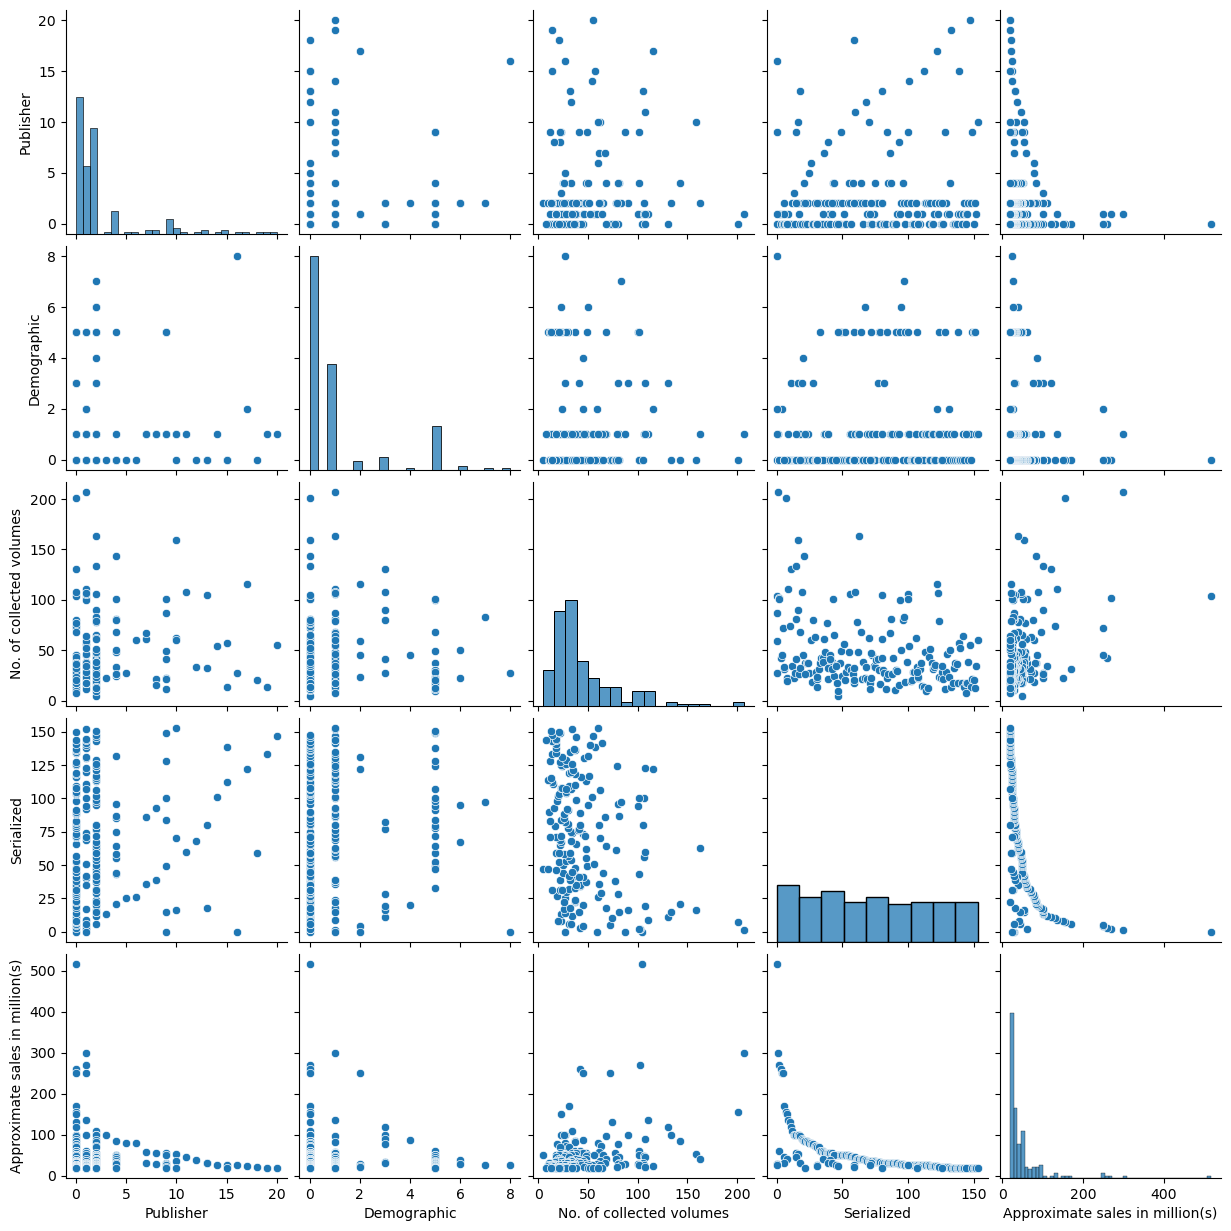

In [17]:
sns.pairplot(manga.iloc[:,2:7])

In [18]:
display(manga.corr())

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
Manga series,1.000000,0.884970,0.173152,0.149889,-0.344958,0.873400,-0.636316,-0.453159
Author(s),0.884970,1.000000,0.139597,0.202649,-0.290808,0.754531,-0.580107,-0.425780
Publisher,0.173152,0.139597,1.000000,0.095579,0.112889,0.092669,-0.162670,-0.187663
Demographic,0.149889,0.202649,0.095579,1.000000,-0.031033,0.123312,-0.123641,-0.110824
No. of collected volumes,-0.344958,-0.290808,0.112889,-0.031033,1.000000,-0.304222,0.385699,-0.300739
Serialized,0.873400,0.754531,0.092669,0.123312,-0.304222,1.000000,-0.562481,-0.398056
Approximate sales in million(s),-0.636316,-0.580107,-0.162670,-0.123641,0.385699,-0.562481,1.000000,0.523410
Average sales per volume in million(s),-0.453159,-0.425780,-0.187663,-0.110824,-0.300739,-0.398056,0.523410,1.000000


# Model Building

In [19]:
#Before we build our model, we need to seperate the X and y values of the dataset

X=manga.drop(['Manga series', 'Demographic', 'Serialized' ], axis=1) #Factors
y=manga['Approximate sales in million(s)'] #What we are testing

In [20]:
#Importing train-test split from sklearn
from sklearn.model_selection import train_test_split

#Performing the train-test split of (70:30) on the train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [21]:
#We will now do our statistical model building. Since the problem that we are testing is not a classification problem, we will
#implement regression (excluding Logistic Regression) and clustering methods

#Importing statistical packages (Regression Methods)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [22]:
#Defining the variables

#Linear Regression
lr = LinearRegression()

#Ridge Regression
ridgeReg = Ridge(alpha=10)

#Lasso Regression
lassoReg = Lasso(alpha=10)

#Lasso Cross Validation
ridge_cv = RidgeCV(alphas=[0.001, 0.001, 0.01, 0.1, 1, 10])

#Scale features
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

display(X_train.shape)
display(X_test.shape)

(130, 5)

(57, 5)

In [23]:
reg_model = [lr, ridgeReg, lassoReg, ridge_cv]

for i in reg_model:
    display("Model:", i)
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    display(i.score(X_test,y_test))
    display(i.score(X_train, y_train))

'Model:'

LinearRegression()

1.0

1.0

'Model:'

Ridge(alpha=10)

0.9941193289964907

0.9911693796822241

'Model:'

Lasso(alpha=10)

0.9730877936151567

0.9741501684797885

'Model:'

RidgeCV(alphas=[0.001, 0.001, 0.01, 0.1, 1, 10])

0.9999999999055967

0.9999999998534076

* **Linear Regression** is the best regression model method based on the accuracies of the test and train data of the dataset with 1.0 to predict the highest sales for a manga series.
* **Lasso Regression** is the lowest regression model with the accuracy score close to 97%

In [24]:
#Decison Tree Regessor
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

[ 20.    20.    55.    60.    40.    25.    40.    25.   100.    25.
  20.    46.    82.   150.    85.    25.    22.    55.    33.33  20.
  25.    25.    24.    20.    20.    50.    23.    70.    50.    20.
 260.    20.    55.5   30.    20.    25.    20.    40.    82.    24.
 150.    30.    32.    20.    24.    70.    25.    32.    24.    40.
  85.    25.    20.    20.    28.    35.    33.  ]


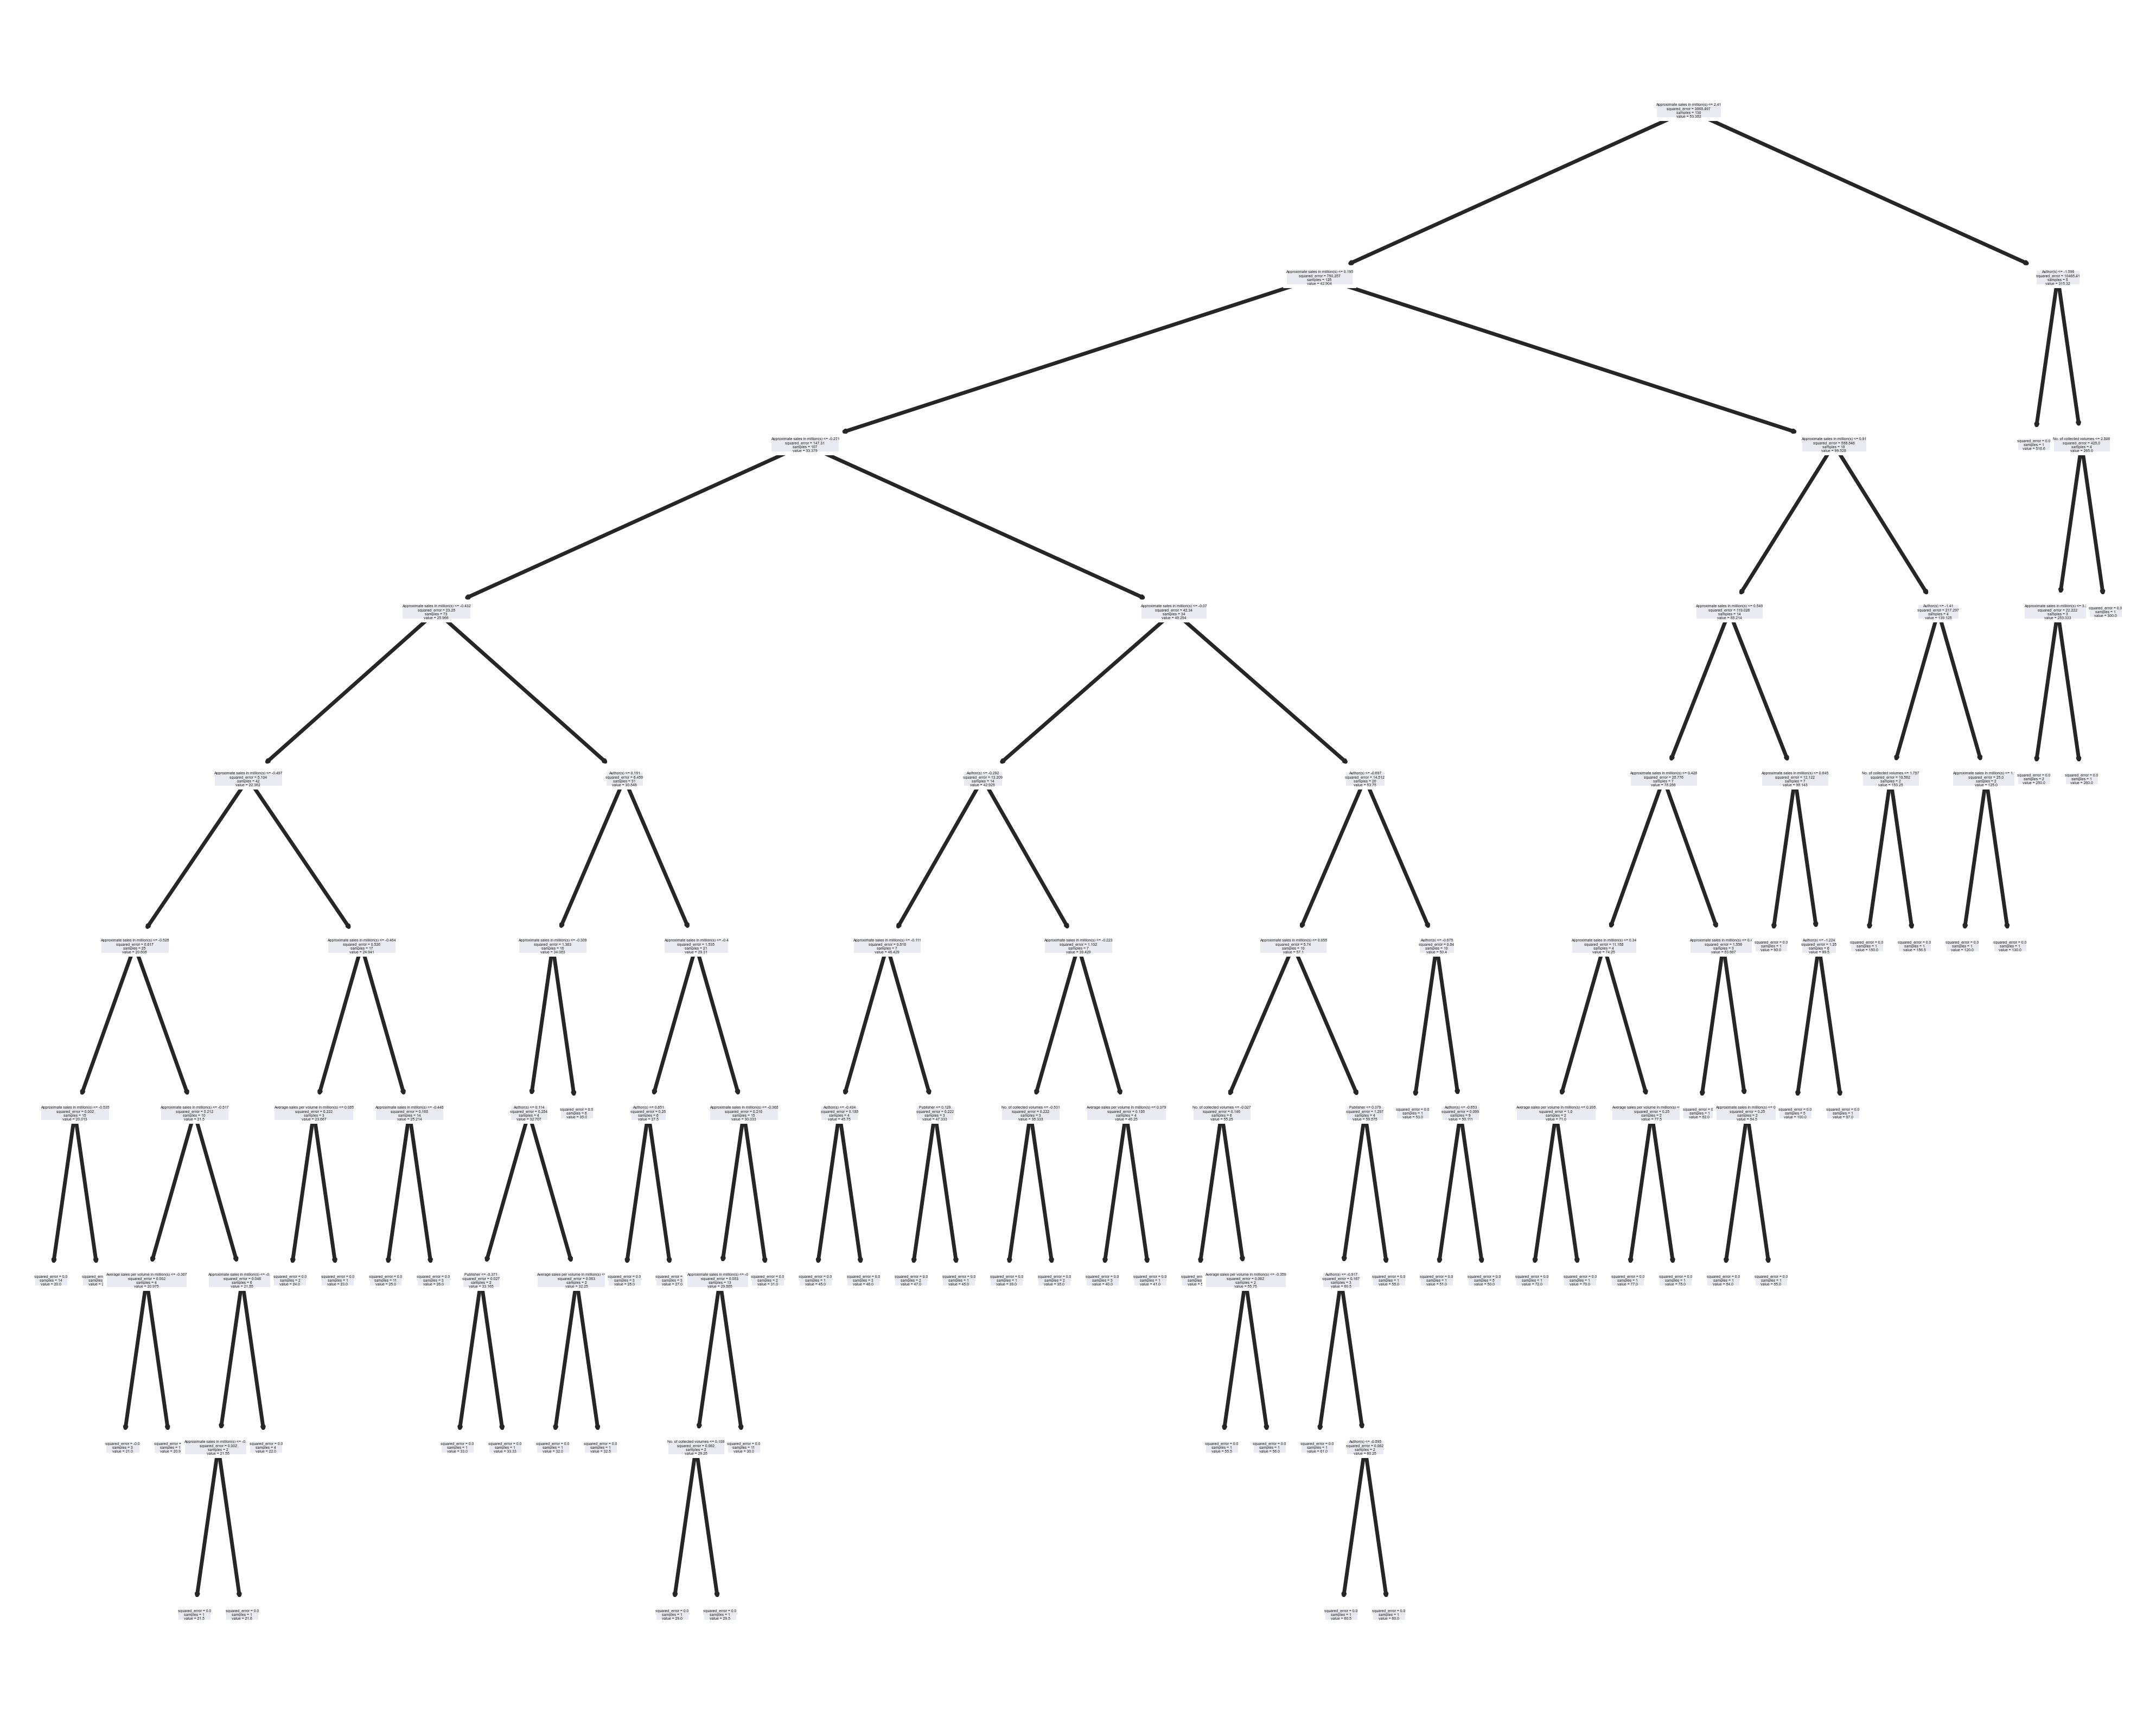

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8), dpi=500)
plot_tree(model, feature_names = X.columns);

In [25]:
#We will try to see how Polynomial Regression works just to see different types of regression methods

#Linear Regression
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(r2_score(y_test, y_pred))

1.0


<Axes: xlabel='Approximate sales in million(s)'>

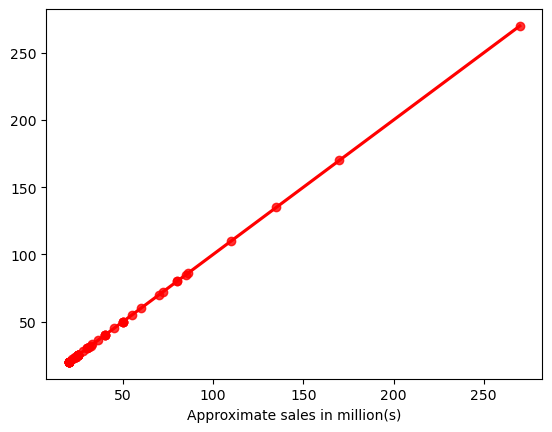

In [26]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [27]:
#Defining the polynomial feature variable
poly = PolynomialFeatures(degree=4, include_bias=True) #We want include_bias to be True 
#because we will use a combination of Linear Regression and Polynomial Features

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.fit_transform(X_test)

lr1 = LinearRegression()

lr1.fit(X_train_trans, y_train)

y_pred_trans = lr1.predict(X_test_trans)

print(r2_score(y_test, y_pred_trans))

print(lr1.coef_)
print(lr1.intercept_)

1.0
[ 3.18533847e+00  3.12799531e-09  5.35573363e-10 -4.09759420e-08
  6.21972441e+01 -4.97759198e-08  1.09647136e-09  8.57919957e-10
  1.18164181e-08 -8.68580052e-09  1.55985300e-08 -5.95460570e-10
  1.60256741e-09  8.78950246e-10  1.35456890e-09 -8.89486969e-08
  2.41797620e-07 -2.59016451e-07 -1.65448802e-07  3.09663686e-07
 -1.39296215e-07  1.12442944e-10  3.91218613e-10  2.42422304e-09
 -1.31827171e-09  2.79372547e-09 -1.51890833e-10  3.03044256e-11
  4.00755784e-09  1.51570534e-10  9.53498192e-09 -1.26300090e-08
  3.57479408e-08  4.34281022e-09 -1.92306846e-08  1.82559559e-08
  7.35016492e-11 -1.85962312e-09  1.93658108e-09 -2.34080343e-09
  3.54490792e-09 -8.91281182e-09  7.16123261e-09  1.16088542e-08
 -7.91864385e-09  2.48718868e-09 -1.18192016e-08  7.52967635e-08
 -2.19123246e-07 -1.49758080e-07  4.64261422e-07 -2.92278299e-07
  9.13073315e-08 -2.41376405e-07  2.03034734e-07 -5.22532915e-08
 -1.24877886e-11  2.46529464e-11  9.05133746e-11  1.08784093e-11
  3.53583829e-12 -2.6

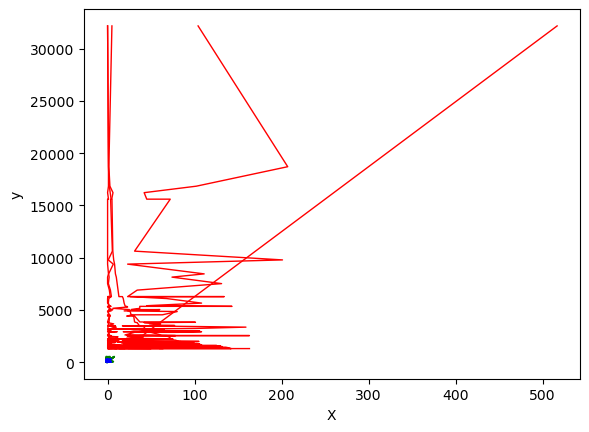

In [28]:
#Plotting the Polynomial Regression
X_new = X
X_poly = poly.fit_transform(X_new)
y_new = lr1.predict(X_poly)

plt.plot(X_new, y_new, color='red', linewidth=1, label='Predictions')
plt.plot(X_train, y_train, color='green', label='Training')
plt.plot(X_test, y_test, color='blue', label='Testing')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

* Looking the **Polynomial Regression**, we see that the **graph is overfitting**. It is better if we keep it as a  linear regression instead of Polynomial Regression.

C:\Users\Kevin Luu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kevin Luu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kevin Luu\AppData\Local\Temp\ipykernel_6376\2700467155.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=manga['Manga series'], y=manga['Approximate sales in million(s)'], data=manga, palette='viridis')


<Axes: xlabel='Manga series', ylabel='Approximate sales in million(s)'>

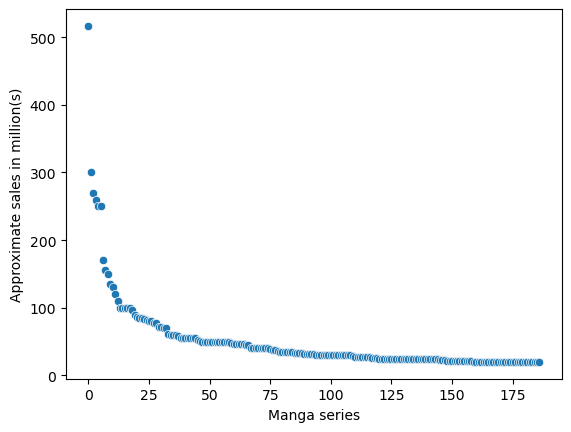

In [29]:
#Next, we will look at Clustering Methods

#We want to see where our testing factor , and 'Manga Series' will be placed in the clustering graph

#Using K-Means Clustering Method
from sklearn.cluster import KMeans

Z=manga[['Manga series', 'Approximate sales in million(s)']]

kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(Z)
kmeans.labels_

sns.scatterplot(x=manga['Manga series'], y=manga['Approximate sales in million(s)'], data=manga, palette='viridis')

C:\Users\Kevin Luu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kevin Luu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kevin Luu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kevin Luu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

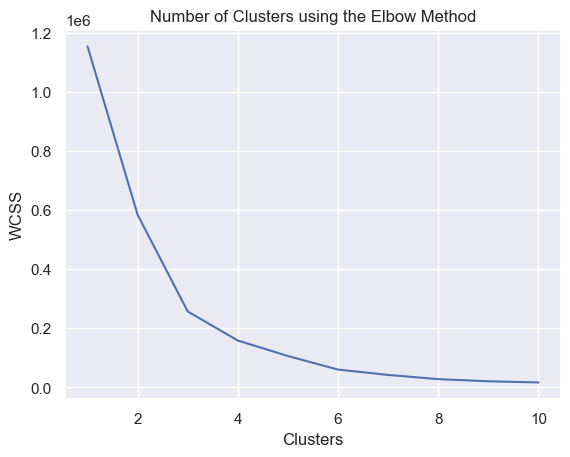

In [30]:
#WCSS = Within Cluster Sum of Squares
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
wcss
    
#Plotting with style
sns.set()

#Plotting
plt.plot(range(1,11),wcss)
plt.title("Number of Clusters using the Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

Looking at the graph on the highest sales for a manga series, it looks to be **'One Piece'**.